In [2]:
import pandas as pd
from scripts import tt
from scripts import kb
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#kb_ = kb.get_kb_completeness()
#kb__ = kb.get_kb_impact_completeness()
tt.training_testing_completeness()
tt.evaluate_techniques()

abalone: 0.6064970740027004
abalone: 0.5975662346477485
abalone: 0.5951309458884462
abalone: 0.5939937722906682
abalone: 0.5943072575757179
abalone: 0.5959981545377766
abalone: 0.5962083519924771
abalone: 0.5975202962701844
abalone: 0.5806830399211668
abalone: 0.5757796881229355
abalone: 0.5753647488400859
abalone: 0.574765256319619
abalone: 0.5748807234527852
abalone: 0.573387108001269
abalone: 0.5766587855933559
abalone: 0.5754024476136089
abalone: 0.5369488337979986
abalone: 0.546368657884697
abalone: 0.5470638482208509
abalone: 0.5496086931419255
abalone: 0.549398710544601
abalone: 0.5486357919166036
abalone: 0.5497167795860358
abalone: 0.5468289260561932
abalone: 0.6009624713291987
abalone: 0.5935572392958033
abalone: 0.5953760153839542
abalone: 0.5915018567326422
abalone: 0.5914460080575975
abalone: 0.5924002644933347
abalone: 0.5923943131338986
abalone: 0.5929891146284734
abalone: 0.6510324541564362
abalone: 0.6487539274972374
abalone: 0.6479558862564517
abalone: 0.6470842467684

In [3]:
import matplotlib.pyplot as plt

def bar_plot(title, labels, training_means):

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    bar = ax.bar(x, training_means, width, label='Testing')
    y_pos = range(len(labels))
    plt.xticks(y_pos, labels, rotation=90)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('RMSE')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')

    fig.tight_layout()
    #plt.savefig(your_path + title + "-all.pdf", bbox_inches='tight')
    #plt.ylim(0,55)
    #plt.savefig(your_path + title + "-ylim.pdf", bbox_inches='tight')

    plt.show()

In [4]:
data = pd.read_csv("../results/prediction_completeness.csv")
data


,dataset,model,technique,rmse
0,abalone,DecisionTree,impute_standard,0.606497
1,abalone,DecisionTree,impute_mode,0.597566
2,abalone,DecisionTree,impute_random,0.595131
3,abalone,DecisionTree,impute_knn,0.593994
4,abalone,DecisionTree,impute_mice,0.594307
...,...,...,...,...
667,visualizing_soil,SVC,impute_knn,0.183772
668,visualizing_soil,SVC,impute_mice,0.185525
669,visualizing_soil,SVC,impute_logistic_regression,0.111509
670,visualizing_soil,SVC,impute_random_forest,0.286249


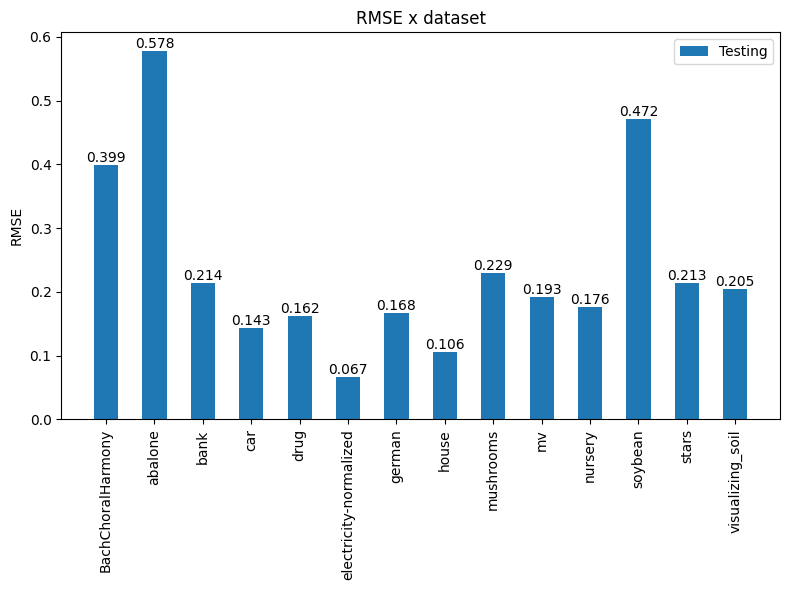

In [5]:
### performance per dataset
df = data[['dataset','rmse']].groupby(['dataset']).mean().reset_index().copy()
bar_plot("RMSE x dataset",df.dataset.unique(),df.rmse)

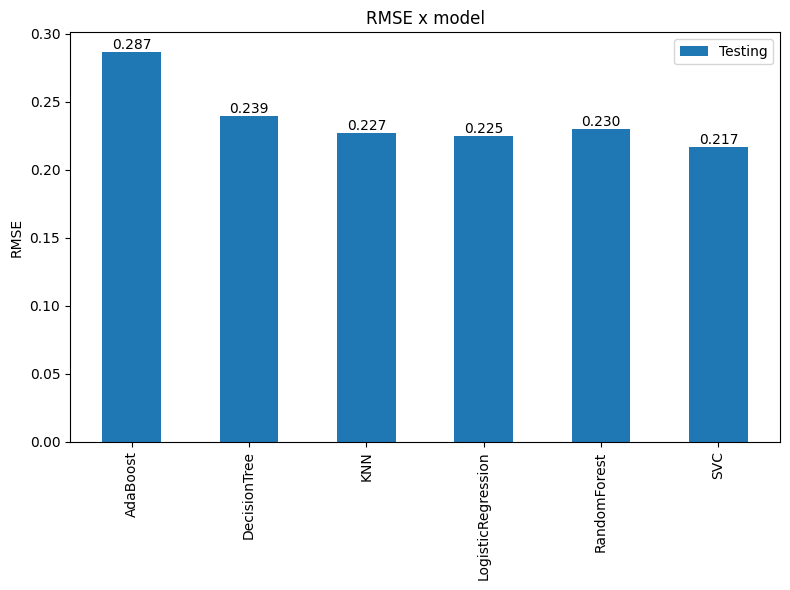

In [6]:
### performance per modello
df = data[['model','rmse']].groupby(['model']).mean().reset_index().copy()
bar_plot("RMSE x model",df.model.unique(),df.rmse)


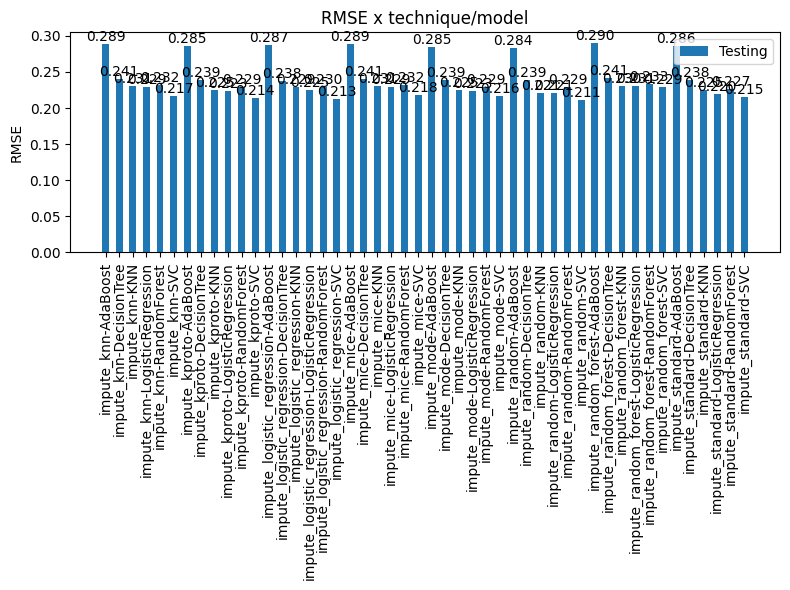

In [7]:
### performance per technique e modello
labels = []
for technique in np.sort(data.technique.unique()):
    for model in np.sort(data.model.unique()):
        labels.append(technique+"-"+model)

df = data[['technique','model','rmse']].groupby(['technique','model']).mean().reset_index().copy()
bar_plot("RMSE x technique/model",labels,df.rmse)

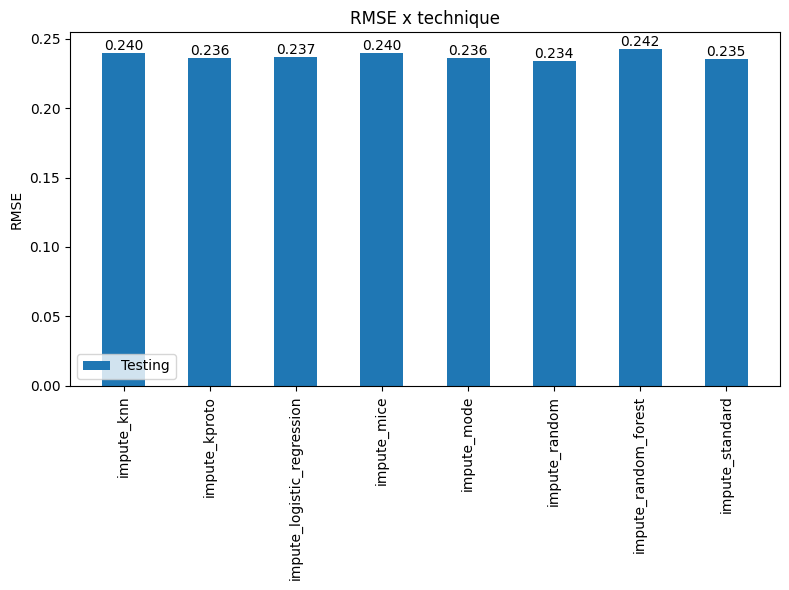

In [8]:
### performance per tecnica
df = data[['technique','rmse']].groupby(['technique']).mean().reset_index().copy()
bar_plot("RMSE x technique",df.technique.unique(),df.rmse)

In [9]:
len(data[data.rmse < 0.10])/len(data)

0.11904761904761904

In [10]:
len(data[data.rmse < 0.15])/len(data)

0.27380952380952384

In [11]:
len(data[data.rmse < 0.20])/len(data)

0.53125

In [12]:
len(data[data.rmse < 0.30])/len(data)

0.7961309523809523

In [13]:
data.rmse.mean()

np.float64(0.23753230560278488)

In [14]:
data.rmse.median()

np.float64(0.19662423904839316)